# Download and visualize tool mentions and citations

This is a notebook that downloads information about mentioned and cited tools from a large list (bio.tools)

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initialization

Get bio.tools publications from file and start the class

In [ ]:
import math

import bh24_literature_mining.utils
from bh24_literature_mining.europepmc_api import EuropePMCClient, Article
from bh24_literature_mining.visualizations import (
    plot_histogram,
    compare_mentions_cites,
    wordcloud_most_mentioned,
)

### Add EDAM topics
Add EDAM topics to DataFrame "tools"

In [ ]:
client = EuropePMCClient()
tools = load_biotools_pub("../data/biotools/biotoolspub_with_pmids8.tsv")

In [ ]:
# Now include EDAM topics for each tool
biotools = load_biotools_from_zip("../data/biotools/biotoolsdump.zip", "biotools.json")

# get all biotoolsIDs from biotools list
biotools_ids = [tool["biotoolsID"] for tool in biotools]

# for each tool, get the EDAM topics and add as new column to "tools"
for index, row in tools.iterrows():
    biotoolsID = row["biotoolsID"]
    # get index of biotoolsID in biotools_ids
    try:
        bio_index = biotools_ids.index(biotoolsID)
    except ValueError:
        continue
    # get EDAM topics for tool
    edam_topics = biotools[bio_index]["topic"]
    # Get term elements for each edam_topic
    edam_topics = [edam_topic["term"] for edam_topic in edam_topics]
    # add EDAM topics to tools dataframe
    tools.at[index, "EDAM_topics"] = ", ".join(edam_topics)

### Read data from json file
In case you already ran the extraction, load the files and skip the querying of Europe PMC below

In [ ]:
biotools_cites = Article.read_cites_from_json("../data/biotools/biotools_cites.json")
biotools_mentions = Article.read_cites_from_json(
    "../data/biotools/biotools_mentions.json"
)

### Run queries to Europe PMC 

In [111]:
tools_small = tools.sample(frac=1).reset_index(drop=True)
tools_small = tools_small[:50]
biotools_mentions = client.get_mentions_for_tools(tools_small, True)
biotools_cites = client.get_cites_for_tools(tools_small)

Total number of tools:  50
Iter: 0, Name: Rtpca, PubMed ID: 32717044, Link: fulltexts/PMC8058776.xml
Iter: 1, Name: VirusHunter, PubMed ID: nan, Link: fulltexts/PMC3805514.xml
Iter: 2, Name: CancerOmicsNet, PubMed ID: 35601606, Link: fulltexts/PMC9119687.xml
Iter: 3, Name: OmixLitMiner, PubMed ID: 32092871, Link: fulltexts/PMC7073124.xml
Iter: 4, Name: VMCMC, PubMed ID: 28187712, Link: fulltexts/PMC5301390.xml
Iter: 5, Name: pftools, PubMed ID: 23505298, Link: fulltexts/PMC3634184.xml
Iter: 6, Name: FFPEcap-seq, PubMed ID: 31649055, Link: fulltexts/PMC6836741.xml
Iter: 7, Name: AHTpin, PubMed ID: 26538599, Link: fulltexts/PMC4702812.xml
Iter: 8, Name: EpiMethEx, PubMed ID: 30717649, Link: fulltexts/PMC7394332.xml
Iter: 9, Name: GENAVi, PubMed ID: 31619158, Link: fulltexts/PMC6796420.xml
Iter: 10, Name: Dali, PubMed ID: 20457744, Link: fulltexts/PMC2896194.xml
Iter: 11, Name: LMdist, PubMed ID: 38060267, Link: fulltexts/PMC10713119.xml
Iter: 12, Name: NGSReadsTreatment, PubMed ID: 31406

### Visualize results

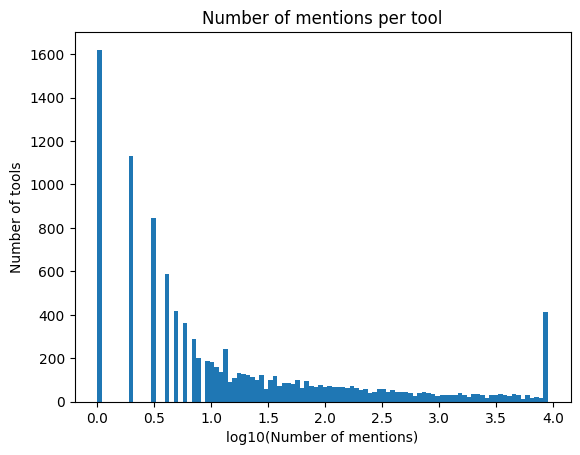

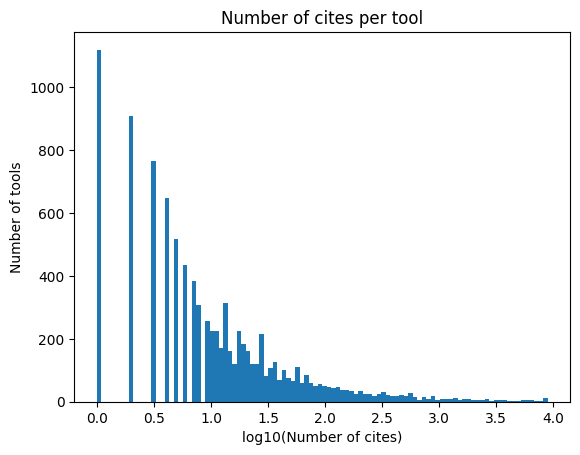

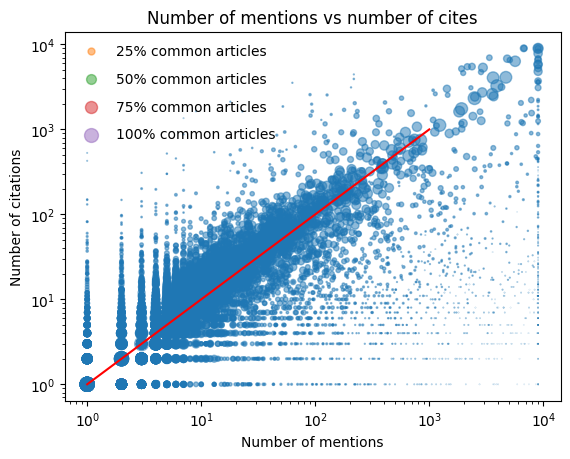

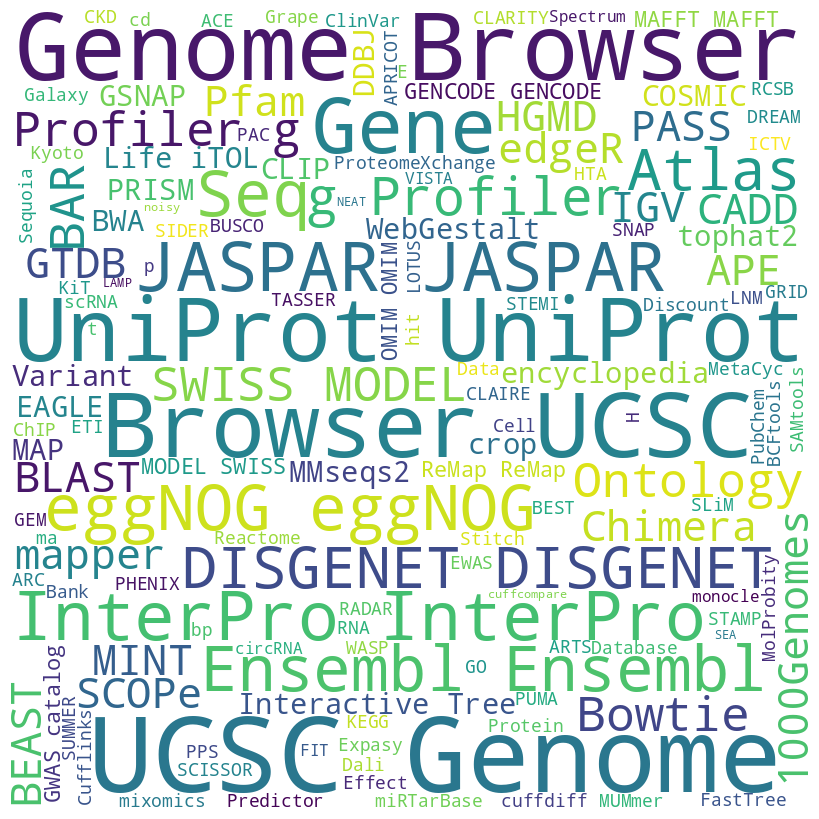

In [ ]:
plot_histogram(biotools_mentions, "mentions")
plot_histogram(biotools_cites, "cites")
compare_mentions_cites(biotools_mentions, biotools_cites)
wordcloud_most_mentioned(biotools_mentions, 1000)

### Save results

In [ ]:
# save as json file
save_to_json(biotools_cites, "../data/biotools/biotools_cites.json")
save_to_json(biotools_mentions, "../data/biotools/biotools_mentions.json")

In [37]:
 num_cites = [len(x["articles"]) for x in biotools_cites]

In [ ]:
num_cites

[3699,
 209,
 1,
 4,
 4,
 74,
 59,
 60,
 56,
 2,
 3,
 4,
 6,
 18,
 9000,
 3091,
 9000,
 3091,
 116,
 5,
 134,
 210,
 146,
 134,
 7,
 58,
 58,
 58,
 58,
 108,
 520,
 6,
 1,
 4,
 5,
 69,
 10,
 6,
 6,
 807,
 458,
 639,
 49,
 3,
 37,
 29,
 1,
 1,
 10,
 4,
 1,
 12,
 3,
 10,
 1,
 51,
 1,
 486,
 29,
 14,
 749,
 223,
 4054,
 2,
 50,
 2119,
 2,
 2,
 1,
 2,
 1,
 2,
 3,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 11,
 1,
 1,
 5,
 3,
 1,
 1,
 3,
 1,
 9,
 15,
 8,
 2,
 3,
 3,
 7,
 5,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 5,
 1,
 4,
 1,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 2,
 1,
 1,
 20,
 7,
 11,
 1,
 10,
 1,
 3,
 4,
 7,
 3,
 1,
 2,
 889,
 1556,
 70,
 2,
 1,
 1,
 4,
 5,
 1,
 2,
 2,
 2,
 2,
 1,
 3,
 5,
 1,
 1,
 1,
 3,
 1,
 12,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 288,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 7625,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 1,
 2,
 1,
 1,
 103,
 6

In [86]:
a = tools["EDAM_topics"][1]
a == ""

True